In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
import pylab
from sklearn.feature_selection import mutual_info_regression

In [56]:
data = pd.read_csv("HouseData.csv")

df = pd.DataFrame(data = data)

df.head()

,İlan_Numarası,İlan_Güncelleme_Tarihi,Kategorisi,Brüt_Metrekare,Binanın_Yaşı,Binanın_Kat_Sayısı,Kullanım_Durumu,Yatırıma_Uygunluk,Eşya_Durumu,Banyo_Sayısı,...,Site_İçerisinde,Takas,Fiyat_Durumu,Fiyatı,İl,İlçe,Mahalle,yaka,Yaşam_endeksi,Nüfus
0,2003,02 Şubat 2022,Satılık,190,5-10,20,Kiracı Oturuyor,Bilinmiyor,Yok,2,...,Hayır,Var,Genel Fiyat,18000000,İstanbul,Beşiktaş,Nisbetiye Mahallesi,Avrupa Yakası,0.911,178.938
1,166,14 Ocak 2022,Satılık,300,21 Ve Üzeri,2,Kiracı Oturuyor,Bilinmiyor,Yok,3,...,Hayır,Var,Genel Fiyat,8500000,İstanbul,Beşiktaş,Akat Mahallesi,Avrupa Yakası,0.911,178.938
2,167,14 Ocak 2022,Satılık,350,21 Ve Üzeri,3,Mülk Sahibi Oturuyor,Bilinmiyor,Yok,2,...,Hayır,Var,Genel Fiyat,16500000,İstanbul,Beşiktaş,Levent Mahallesi,Avrupa Yakası,0.911,178.938
3,115,06 Ocak 2022,Satılık,450,5-10,4,Kiracı Oturuyor,Bilinmiyor,Yok,3,...,Hayır,Var,Genel Fiyat,22000000,İstanbul,Beşiktaş,Levazım Mahallesi,Avrupa Yakası,0.911,178.938
4,2879,08 Şubat 2022,Satılık,160,21 Ve Üzeri,2,Mülk Sahibi Oturuyor,Bilinmiyor,Yok,1,...,Hayır,Var,Genel Fiyat,4250000,İstanbul,Beşiktaş,Nisbetiye Mahallesi,Avrupa Yakası,0.911,178.938


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   İlan_Numarası           2983 non-null   int64  
 1   İlan_Güncelleme_Tarihi  2983 non-null   object 
 2   Kategorisi              2983 non-null   object 
 3   Brüt_Metrekare          2983 non-null   int64  
 4   Binanın_Yaşı            2983 non-null   object 
 5   Binanın_Kat_Sayısı      2983 non-null   int64  
 6   Kullanım_Durumu         2983 non-null   object 
 7   Yatırıma_Uygunluk       2983 non-null   object 
 8   Eşya_Durumu             2983 non-null   object 
 9   Banyo_Sayısı            2983 non-null   object 
 10  İlan_Oluşturma_Tarihi   2983 non-null   object 
 11  Türü                    2983 non-null   object 
 12  Net_Metrekare           2983 non-null   int64  
 13  Oda_Sayısı              2983 non-null   object 
 14  Bulunduğu_Kat           2983 non-null   

In [58]:
df.columns

Index(['İlan_Numarası', 'İlan_Güncelleme_Tarihi', 'Kategorisi',
       'Brüt_Metrekare', 'Binanın_Yaşı', 'Binanın_Kat_Sayısı',
       'Kullanım_Durumu', 'Yatırıma_Uygunluk', 'Eşya_Durumu', 'Banyo_Sayısı',
       'İlan_Oluşturma_Tarihi', 'Türü', 'Net_Metrekare', 'Oda_Sayısı',
       'Bulunduğu_Kat', 'Isıtma_Tipi', 'Krediye_Uygunluk', 'Site_İçerisinde',
       'Takas', 'Fiyat_Durumu', 'Fiyatı', 'İl', 'İlçe', 'Mahalle', 'yaka',
       'Yaşam_endeksi', 'Nüfus'],
      dtype='object')

In [59]:
drop_columns = ['İlan_Numarası', 'İlan_Güncelleme_Tarihi', 'Kategorisi', 'Yatırıma_Uygunluk', 'İlan_Oluşturma_Tarihi', 'Türü', 'Krediye_Uygunluk', 'Site_İçerisinde', 'Takas', 'Fiyat_Durumu', 'İl', 'Nüfus']
df = df.drop(drop_columns, axis = 1)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brüt_Metrekare      2983 non-null   int64  
 1   Binanın_Yaşı        2983 non-null   object 
 2   Binanın_Kat_Sayısı  2983 non-null   int64  
 3   Kullanım_Durumu     2983 non-null   object 
 4   Eşya_Durumu         2983 non-null   object 
 5   Banyo_Sayısı        2983 non-null   object 
 6   Net_Metrekare       2983 non-null   int64  
 7   Oda_Sayısı          2983 non-null   object 
 8   Bulunduğu_Kat       2983 non-null   object 
 9   Isıtma_Tipi         2983 non-null   object 
 10  Fiyatı              2983 non-null   int64  
 11  İlçe                2983 non-null   object 
 12  Mahalle             2983 non-null   object 
 13  yaka                2983 non-null   object 
 14  Yaşam_endeksi       2983 non-null   float64
dtypes: float64(1), int64(4), object(10)
memory usage: 349.7

In [61]:
df.describe()

,Brüt_Metrekare,Binanın_Kat_Sayısı,Net_Metrekare,Fiyatı,Yaşam_endeksi
count,2983.000000,2983.000000,2983.000000,2.983000e+03,2983.000000
mean,169.342943,8.669796,145.346631,5.221566e+06,0.212120
std,373.361202,7.091614,370.482565,3.716717e+07,0.401684
min,35.000000,1.000000,1.000000,1.690000e+05,-0.194000
25%,100.000000,4.000000,84.000000,8.700000e+05,-0.152000
50%,130.000000,5.000000,106.000000,1.650000e+06,0.053000
75%,180.000000,11.000000,150.000000,3.807500e+06,0.613000
max,13500.000000,44.000000,13499.000000,1.800000e+09,0.911000


In [62]:
df['Mahalle'].value_counts()

Mahalle
 Kayabaşı Mahallesi                96
 Cevizli Mahallesi                 65
 Bahçeşehir 2. Kısım Mahallesi     65
 Göztepe Mahallesi                 65
 Altıntepe Mahallesi               61
                                   ..
 Şahintepe Mahallesi                1
 İkitelli OSB Mahallesi             1
 Baltalimanı Mahallesi              1
 Muradiye Mahallesi                 1
 Darüşşafaka Mahallesi              1
Name: count, Length: 210, dtype: int64

In [63]:
#kategorik veriler

/tmp/ipykernel_8888/469838693.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kullanım_Durumu', data=df, palette='mako')


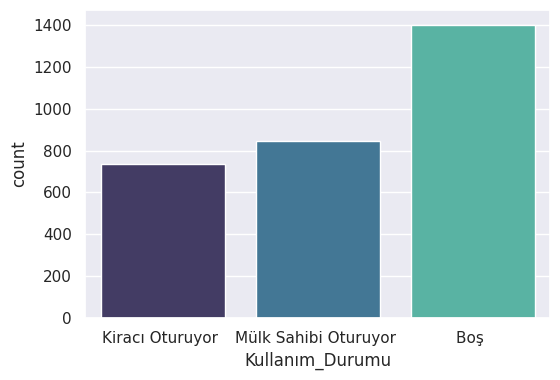

In [64]:
plt.figure(figsize=(6,4))
sns.countplot(x='Kullanım_Durumu', data=df, palette='mako')
plt.xlabel('Kullanım_Durumu')
plt.show()

/tmp/ipykernel_8888/877393244.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Eşya_Durumu', data=df, palette='mako')


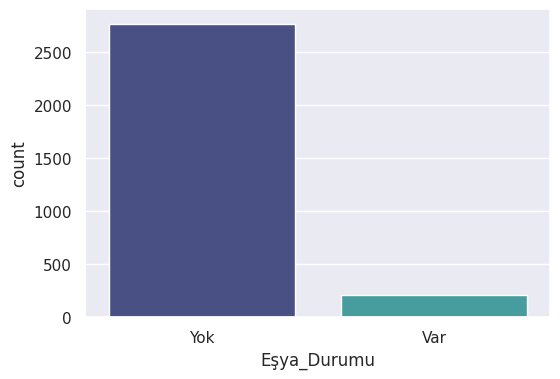

In [65]:
plt.figure(figsize=(6,4))
sns.countplot(x='Eşya_Durumu', data=df, palette='mako')
plt.xlabel('Eşya_Durumu')
plt.show()

/tmp/ipykernel_8888/4084777562.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Banyo_Sayısı', data=df, palette='mako')


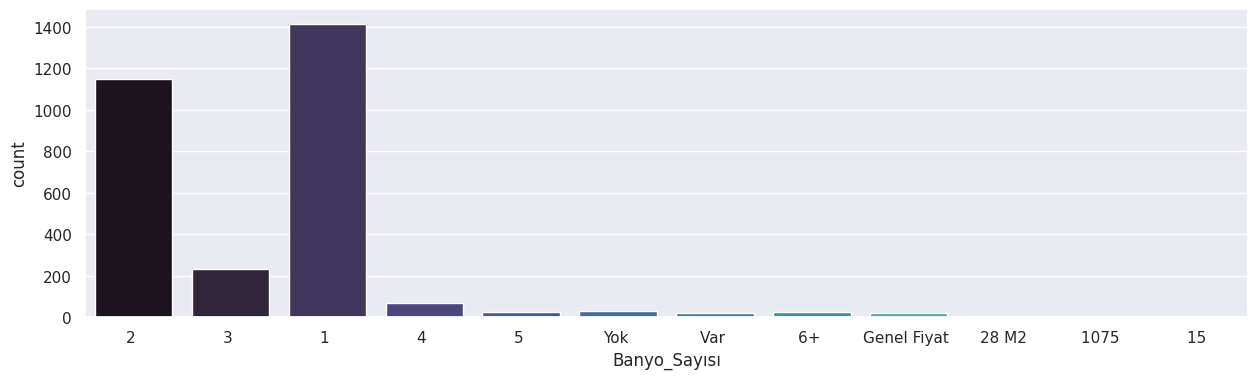

In [66]:
plt.figure(figsize=(15,4))
sns.countplot(x='Banyo_Sayısı', data=df, palette='mako')
plt.xlabel('Banyo_Sayısı')
plt.show()

/tmp/ipykernel_8888/1111193895.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Isıtma_Tipi', data=df, palette='mako')


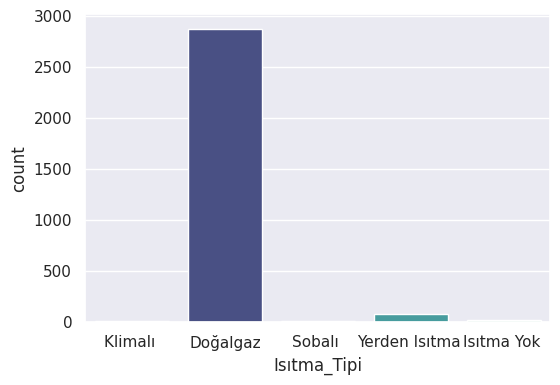

In [67]:
plt.figure(figsize=(6,4))
sns.countplot(x='Isıtma_Tipi', data=df, palette='mako')
plt.xlabel('Isıtma_Tipi')
plt.show()

/tmp/ipykernel_8888/3806007056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='İlçe', data=df, palette='mako')


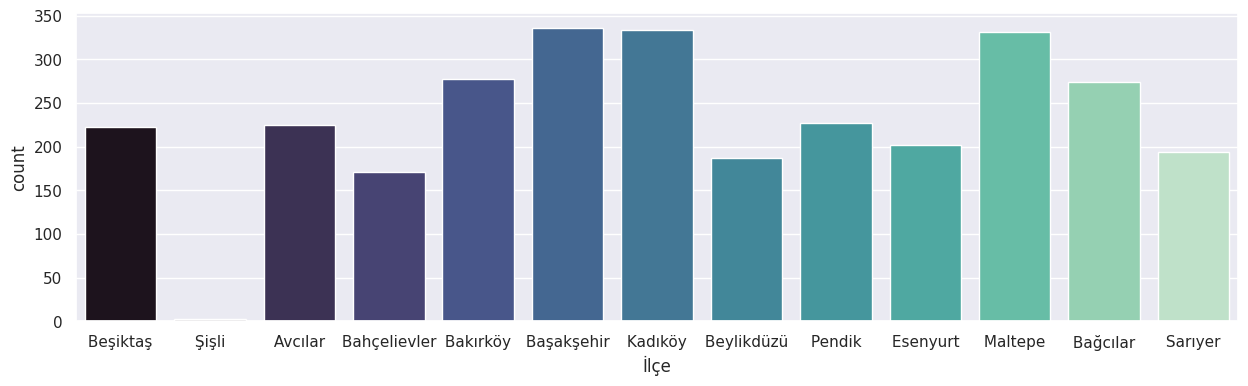

In [68]:
plt.figure(figsize=(15,4))
sns.countplot(x='İlçe', data=df, palette='mako')
plt.xlabel('İlçe')
plt.show()

/tmp/ipykernel_8888/1828550496.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='yaka', data=df, palette='mako')


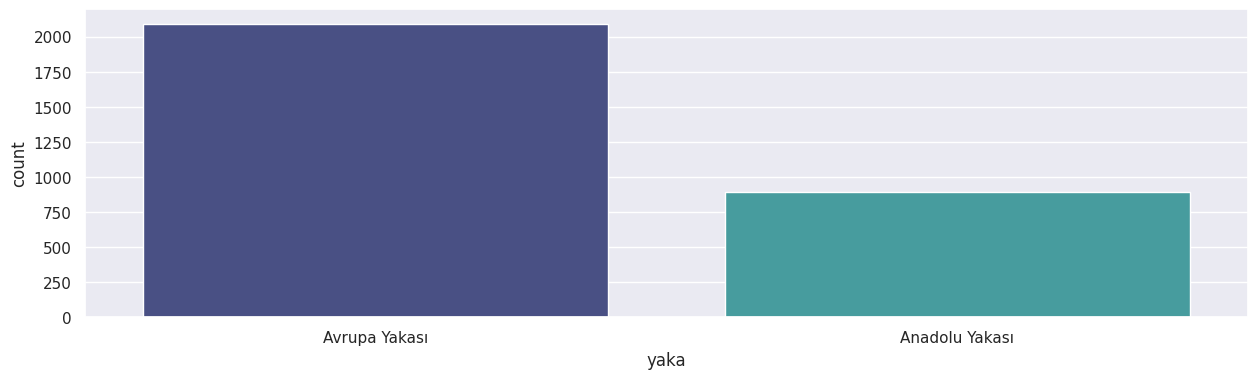

In [69]:
plt.figure(figsize=(15,4))
sns.countplot(x='yaka', data=df, palette='mako')
plt.xlabel('yaka')
plt.show()

In [70]:
#sayisal veriler

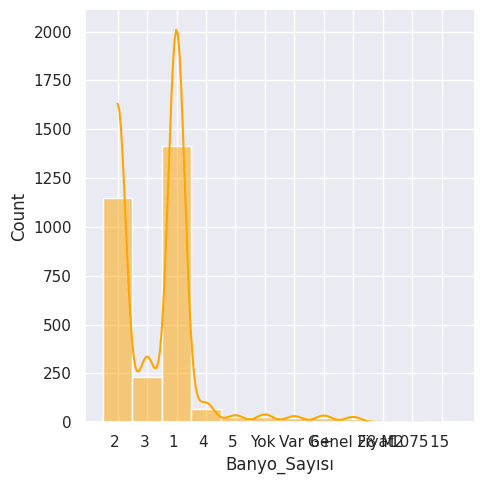

In [71]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df['Banyo_Sayısı'], kde=True, color='orange', bins=10)

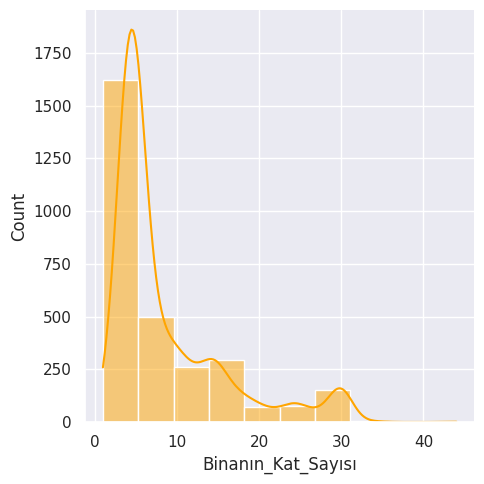

In [72]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df['Binanın_Kat_Sayısı'], kde=True, color='orange', bins=10)

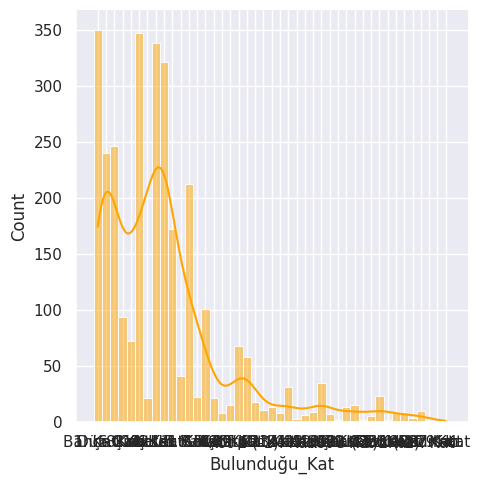

In [73]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df['Bulunduğu_Kat'], kde=True, color='orange', bins=10)

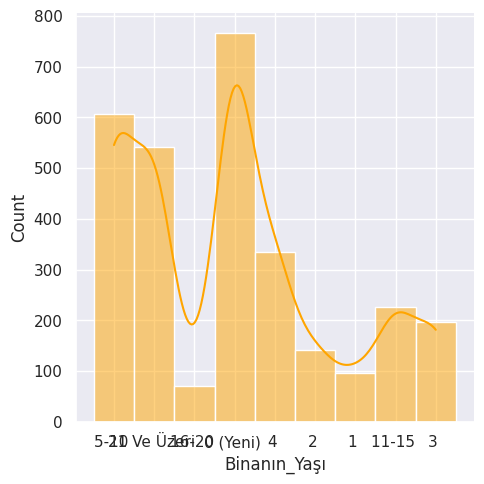

In [74]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df['Binanın_Yaşı'], kde=True, color='orange', bins=10)

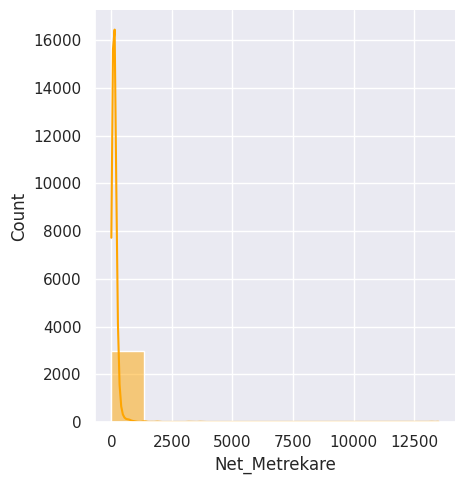

In [75]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df['Net_Metrekare'], kde=True, color='orange', bins=10)

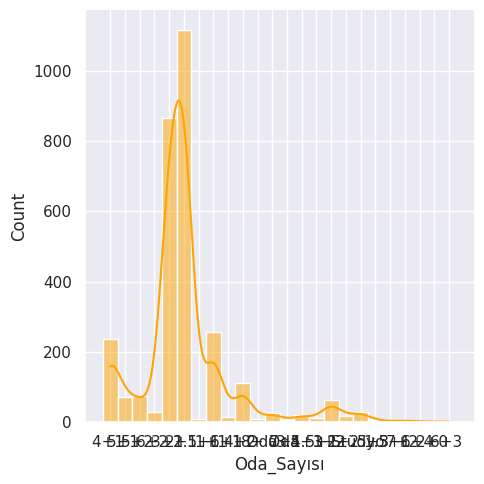

In [76]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df['Oda_Sayısı'], kde=True, color='orange', bins=10)

In [77]:
df.duplicated().sum() #birbirinin aynisi olan veri sayisini dondurur

3

In [78]:
df = df.drop_duplicates() #birbiri ile ayni olan satirlari silelim

In [79]:
df.isnull().sum()

Brüt_Metrekare        0
Binanın_Yaşı          0
Binanın_Kat_Sayısı    0
Kullanım_Durumu       0
Eşya_Durumu           0
Banyo_Sayısı          0
Net_Metrekare         0
Oda_Sayısı            0
Bulunduğu_Kat         0
Isıtma_Tipi           0
Fiyatı                0
İlçe                  0
Mahalle               0
yaka                  0
Yaşam_endeksi         0
dtype: int64

In [80]:
#Aykirilik olusturan verileri temizleyelim

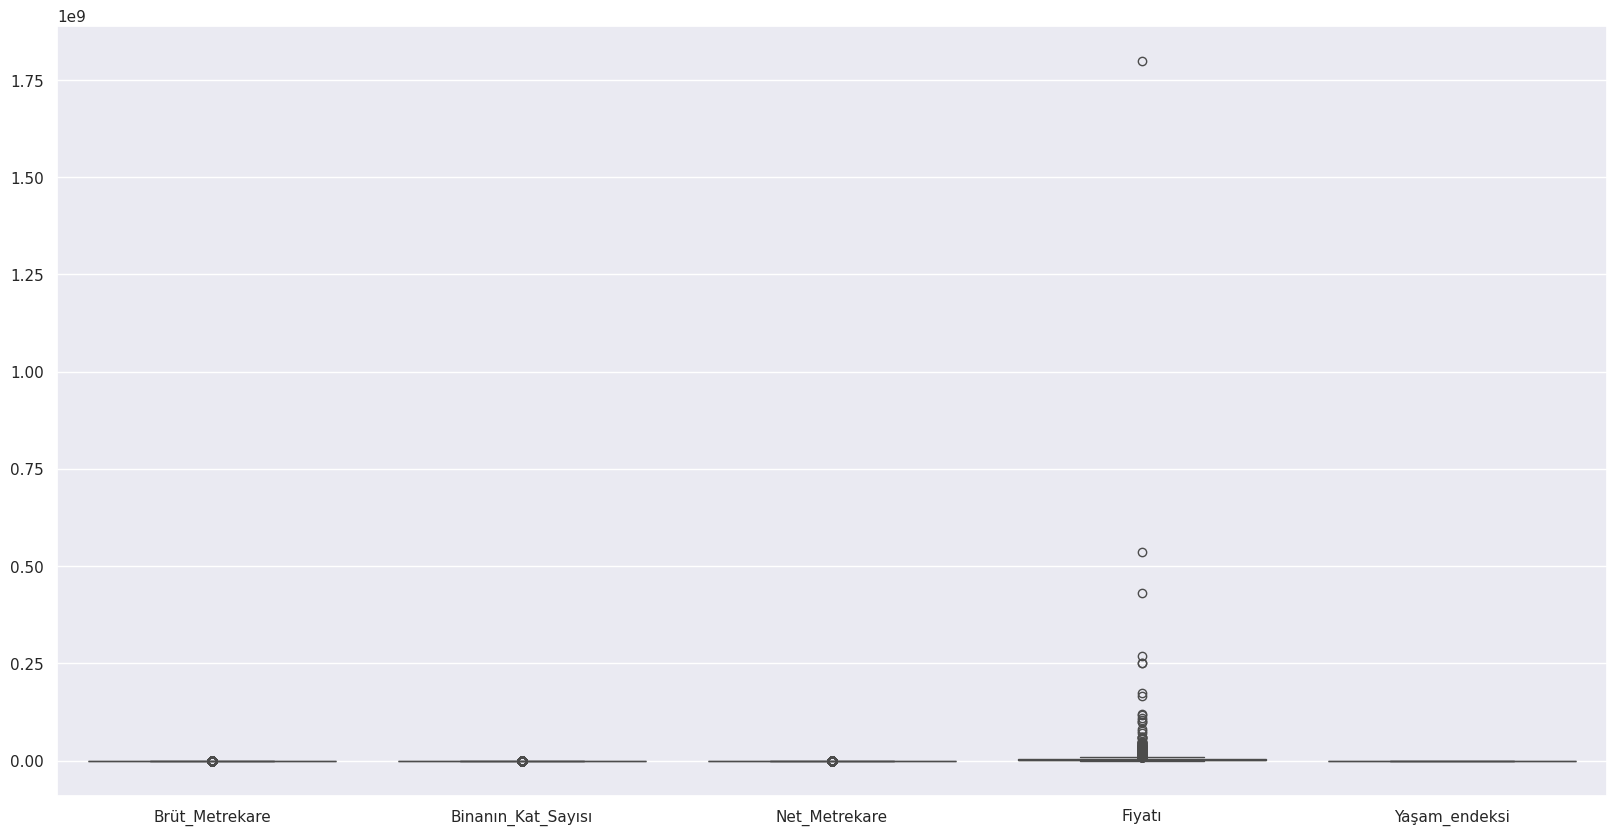

In [81]:
num_cols = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(20, 10))

sns.boxplot(data=num_cols)
plt.show()

In [82]:
def remove_outliers(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])

    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)

    return lower_range, upper_range

In [83]:
for i in num_cols.columns:
    lower_range, upper_range = remove_outliers(df[i])
    df[i] = np.where(df[i] > upper_range, upper_range, df[i])
    df[i] = np.where(df[i] < lower_range, lower_range, df[i])

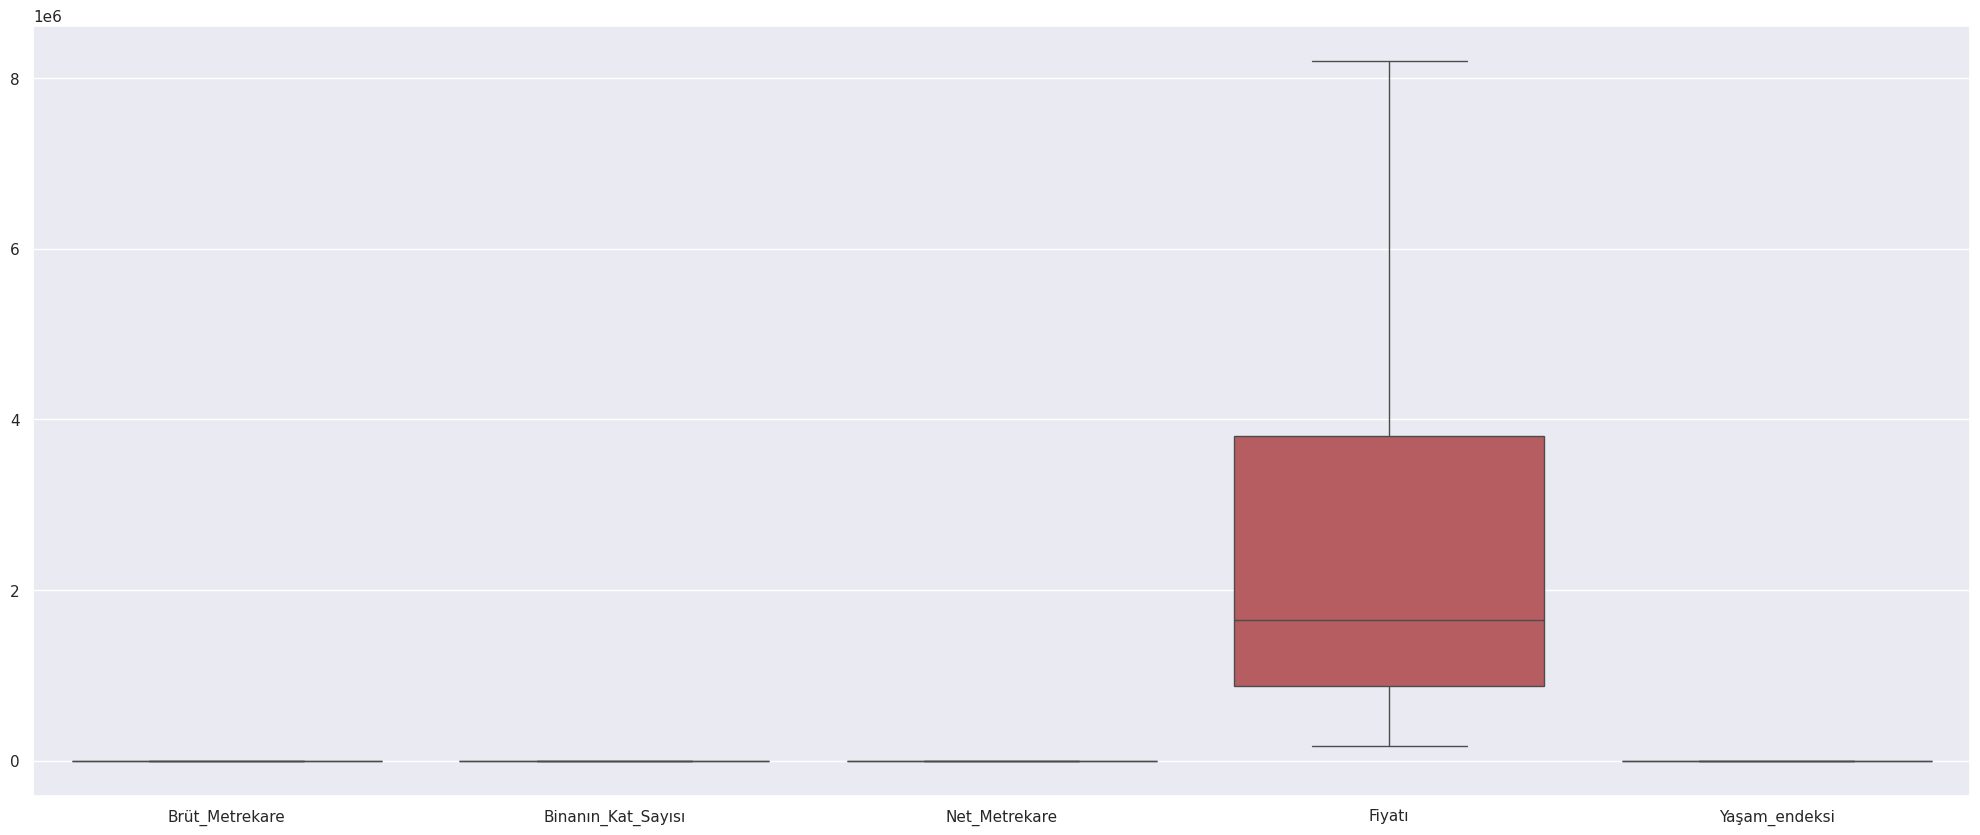

In [84]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(25, 10))

sns.boxplot(data=num_cols)
plt.show()

In [85]:
#Ciktiya gore verilerin analizi

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2980 entries, 0 to 2982
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brüt_Metrekare      2980 non-null   float64
 1   Binanın_Yaşı        2980 non-null   object 
 2   Binanın_Kat_Sayısı  2980 non-null   float64
 3   Kullanım_Durumu     2980 non-null   object 
 4   Eşya_Durumu         2980 non-null   object 
 5   Banyo_Sayısı        2980 non-null   object 
 6   Net_Metrekare       2980 non-null   float64
 7   Oda_Sayısı          2980 non-null   object 
 8   Bulunduğu_Kat       2980 non-null   object 
 9   Isıtma_Tipi         2980 non-null   object 
 10  Fiyatı              2980 non-null   float64
 11  İlçe                2980 non-null   object 
 12  Mahalle             2980 non-null   object 
 13  yaka                2980 non-null   object 
 14  Yaşam_endeksi       2980 non-null   float64
dtypes: float64(5), object(10)
memory usage: 372.5+ KB


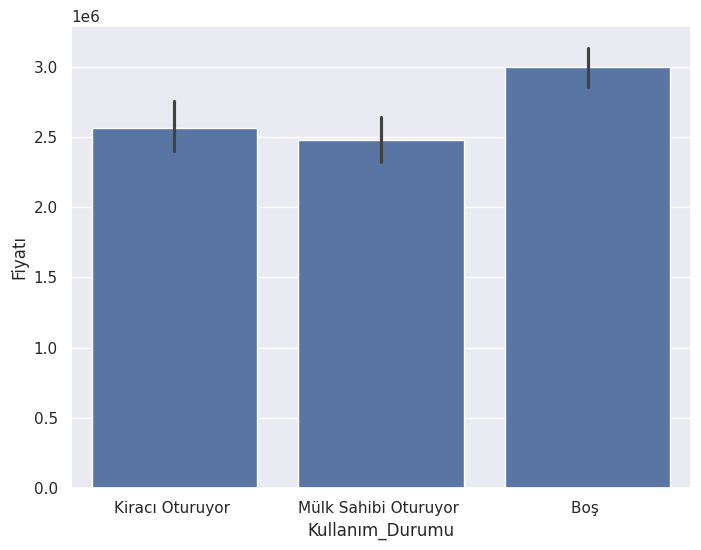

In [87]:
plt.figure(figsize=(8,6))
sns.barplot(x='Kullanım_Durumu', y='Fiyatı', data=df)
plt.show()

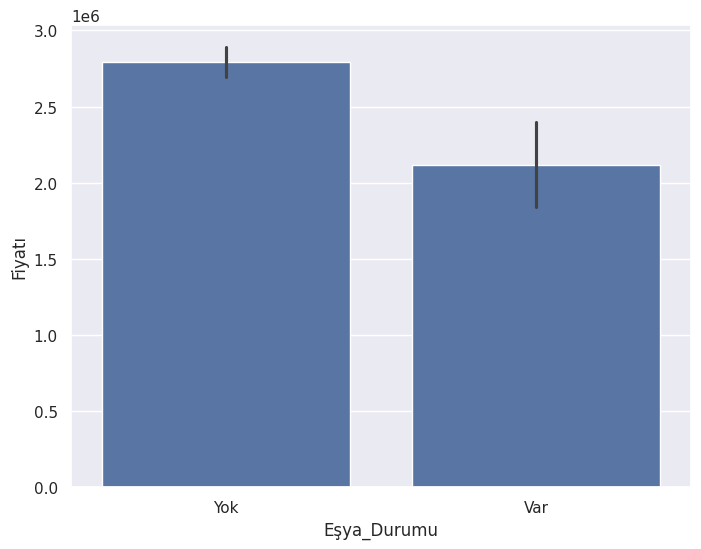

In [88]:
plt.figure(figsize=(8,6))
sns.barplot(x='Eşya_Durumu', y='Fiyatı', data=df)
plt.show()

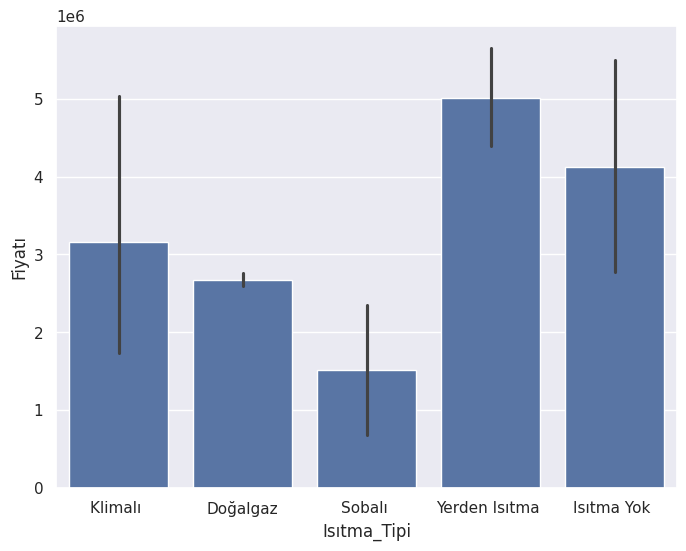

In [89]:
plt.figure(figsize=(8,6))
sns.barplot(x='Isıtma_Tipi', y='Fiyatı', data=df)
plt.show()

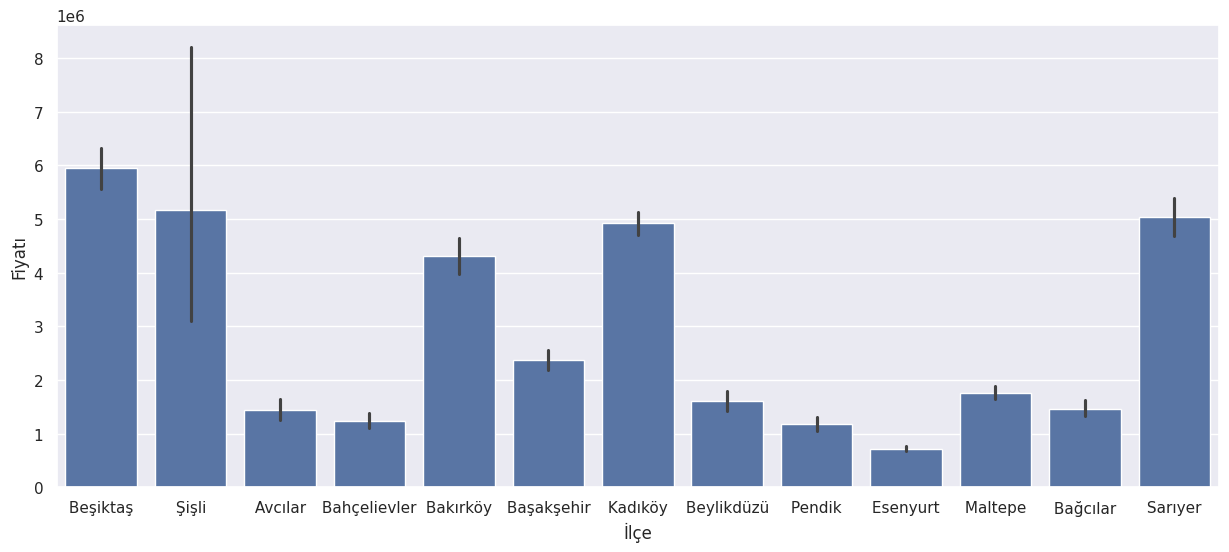

In [90]:
plt.figure(figsize=(15,6))
sns.barplot(x='İlçe', y='Fiyatı', data=df)
plt.show()

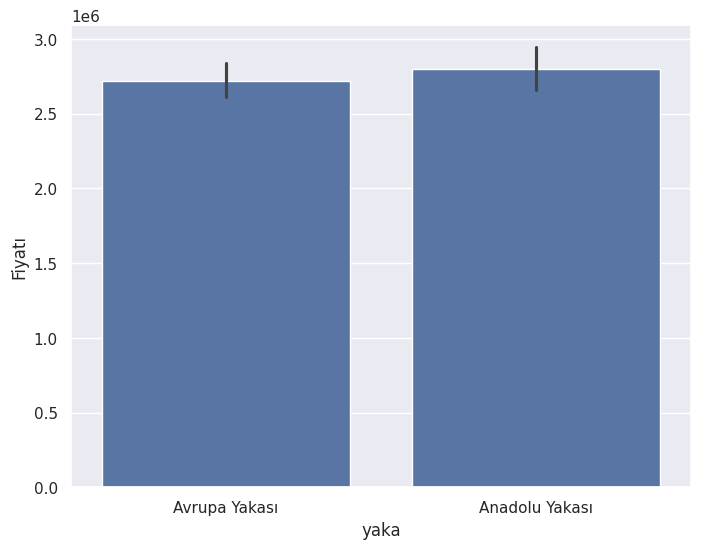

In [91]:
plt.figure(figsize=(8,6))
sns.barplot(x='yaka', y='Fiyatı', data=df)
plt.show()

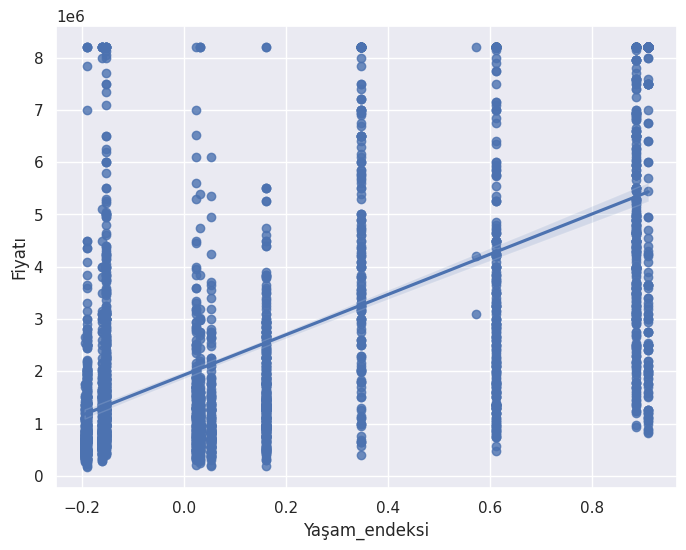

In [92]:
plt.figure(figsize=(8,6))
sns.regplot(x='Yaşam_endeksi', y='Fiyatı', data=df)
plt.show()

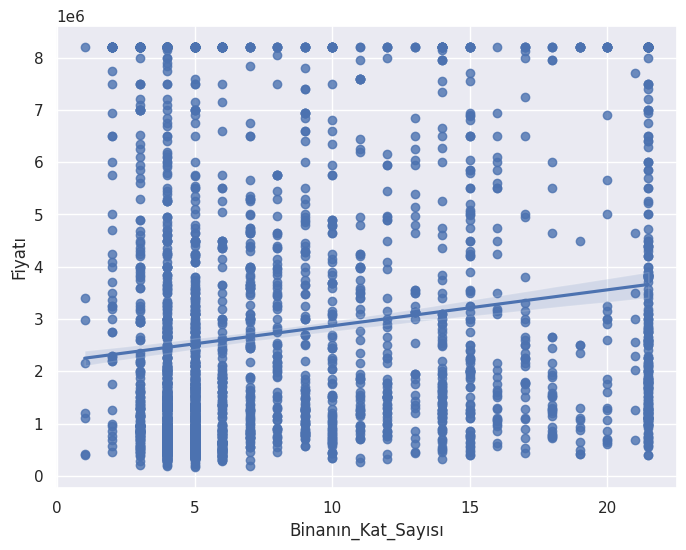

In [93]:
plt.figure(figsize=(8,6))
sns.regplot(x='Binanın_Kat_Sayısı', y='Fiyatı', data=df)
plt.show()

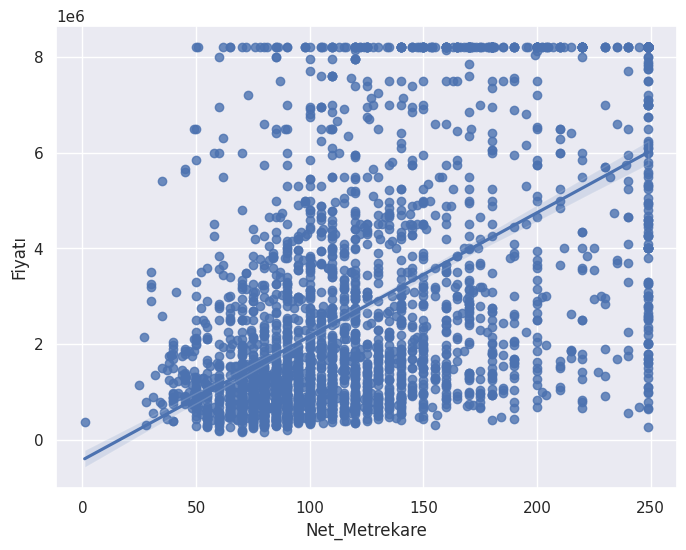

In [94]:
plt.figure(figsize=(8,6))
sns.regplot(x='Net_Metrekare', y='Fiyatı', data=df)
plt.show()

/tmp/ipykernel_8888/976387761.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (num_cols [variable], kde=True, bins=10)


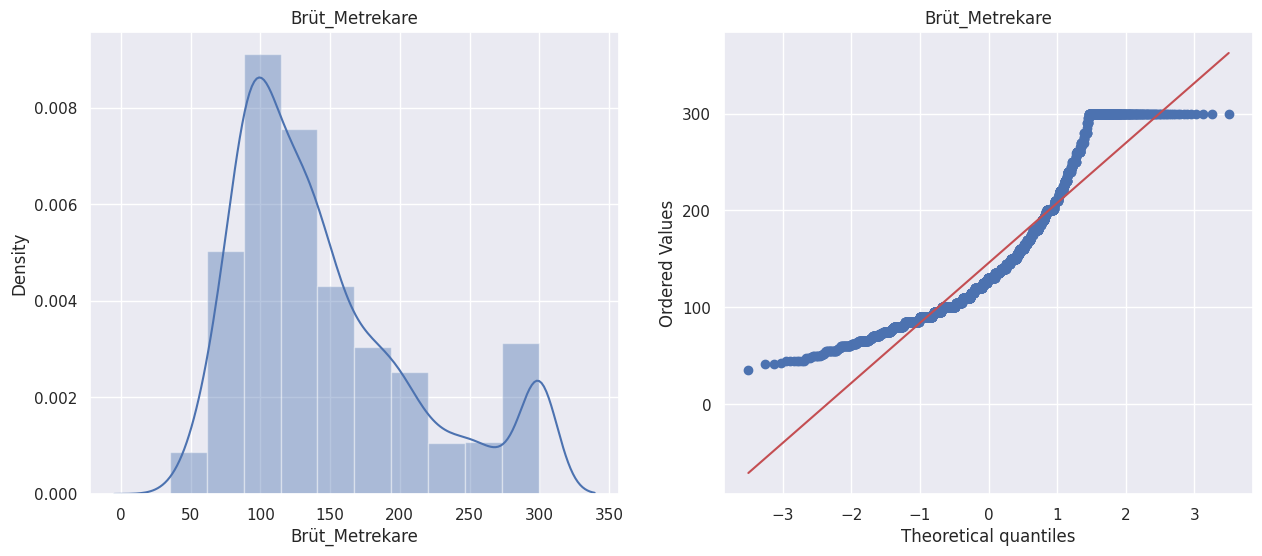

/tmp/ipykernel_8888/976387761.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (num_cols [variable], kde=True, bins=10)


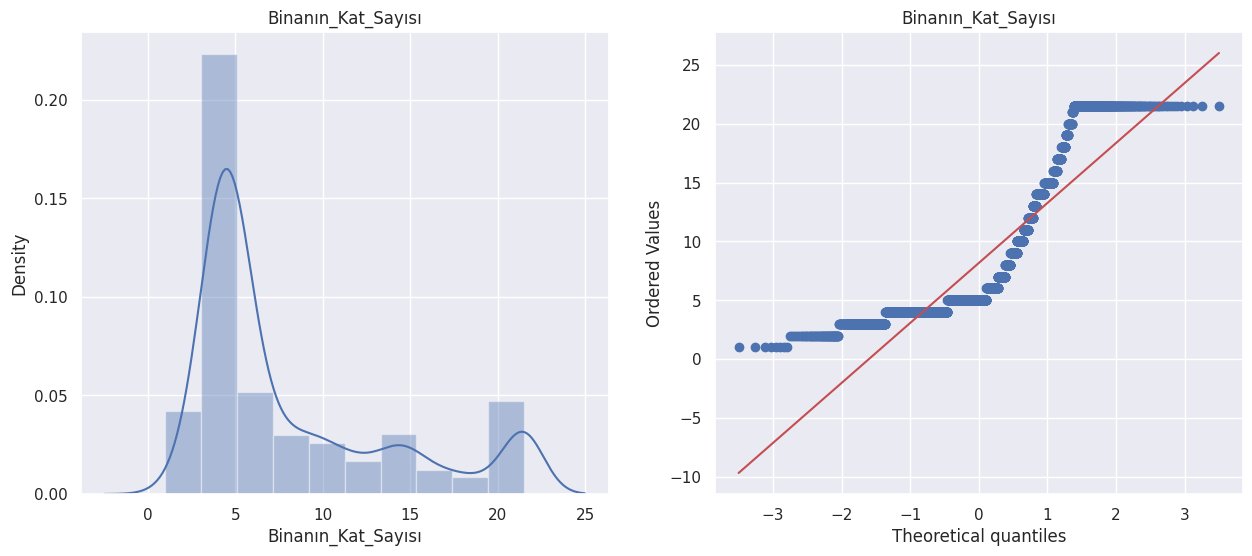

/tmp/ipykernel_8888/976387761.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (num_cols [variable], kde=True, bins=10)


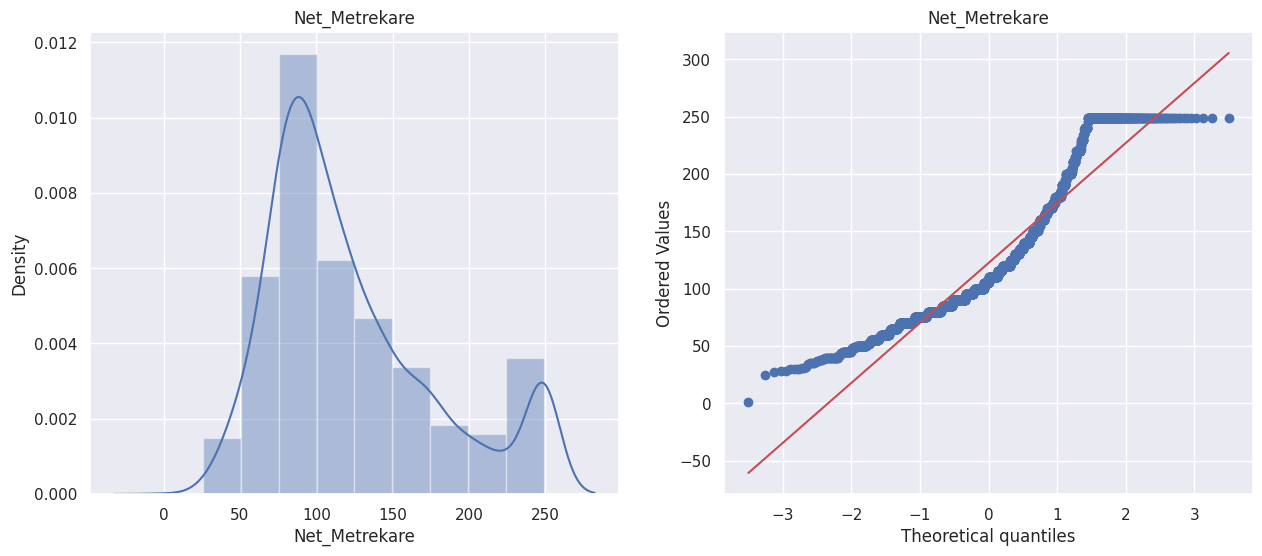

/tmp/ipykernel_8888/976387761.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (num_cols [variable], kde=True, bins=10)


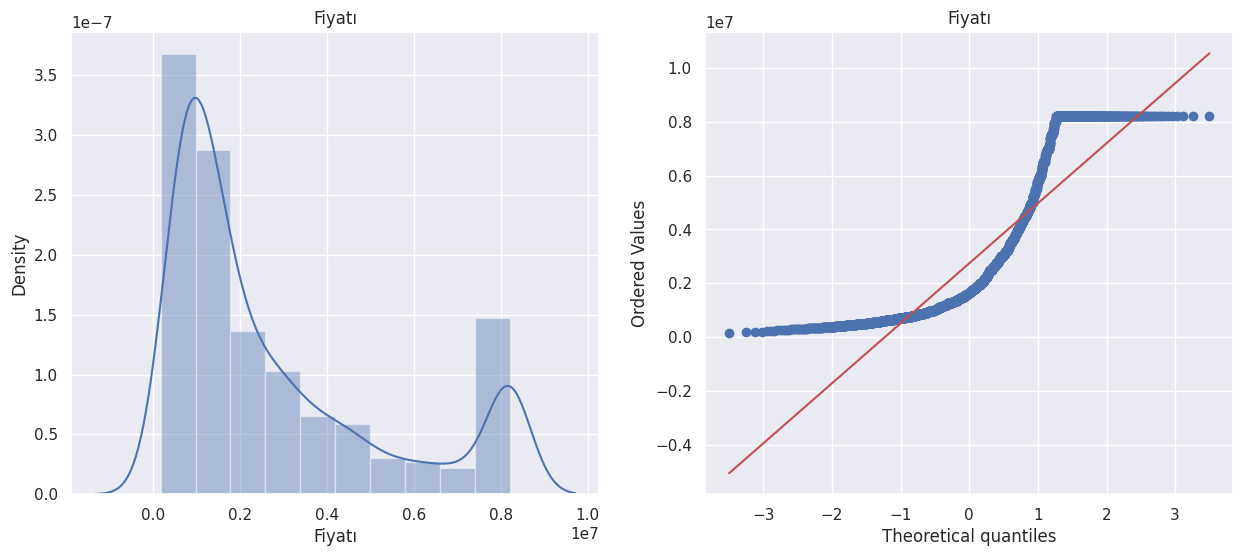

/tmp/ipykernel_8888/976387761.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (num_cols [variable], kde=True, bins=10)


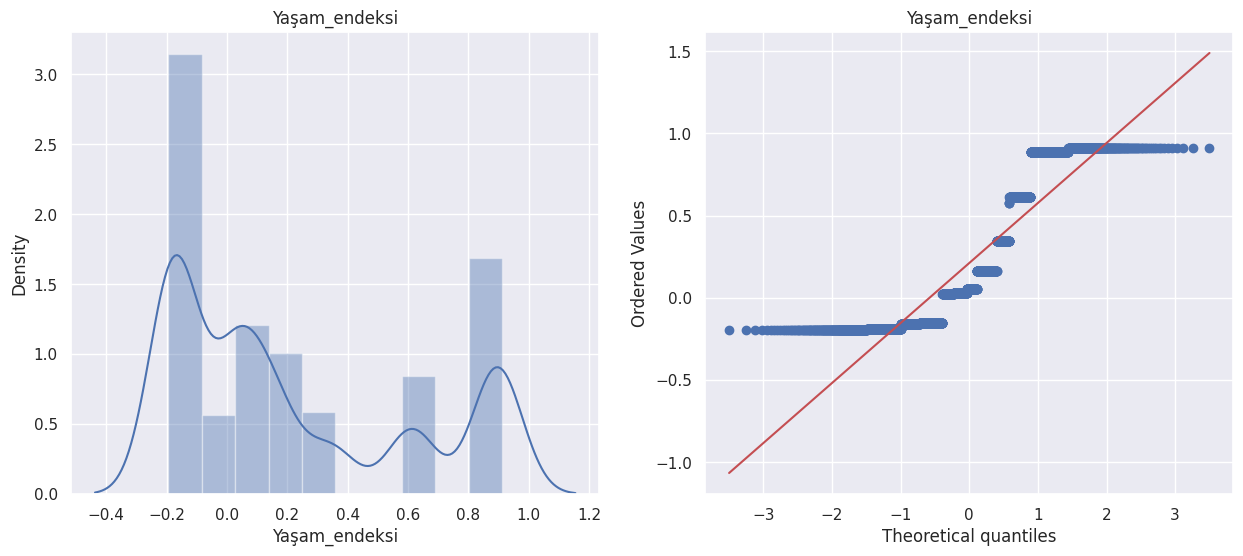

In [95]:
num_cols = df.select_dtypes (include= ["int64","float64"])

def plots (num_cols, variable):
    plt. figure (figsize=(15,6))
    plt.subplot (1, 2, 1)
    #num_cols [variable].hist()
    sns.distplot (num_cols [variable], kde=True, bins=10)
    plt.title(variable)
    plt.subplot (1, 2, 2)
    stats.probplot (num_cols [variable], dist="norm", plot=pylab)
    plt.title (variable)
    plt.show()
for i in num_cols.columns:
    plots (num_cols, i)

<Axes: >

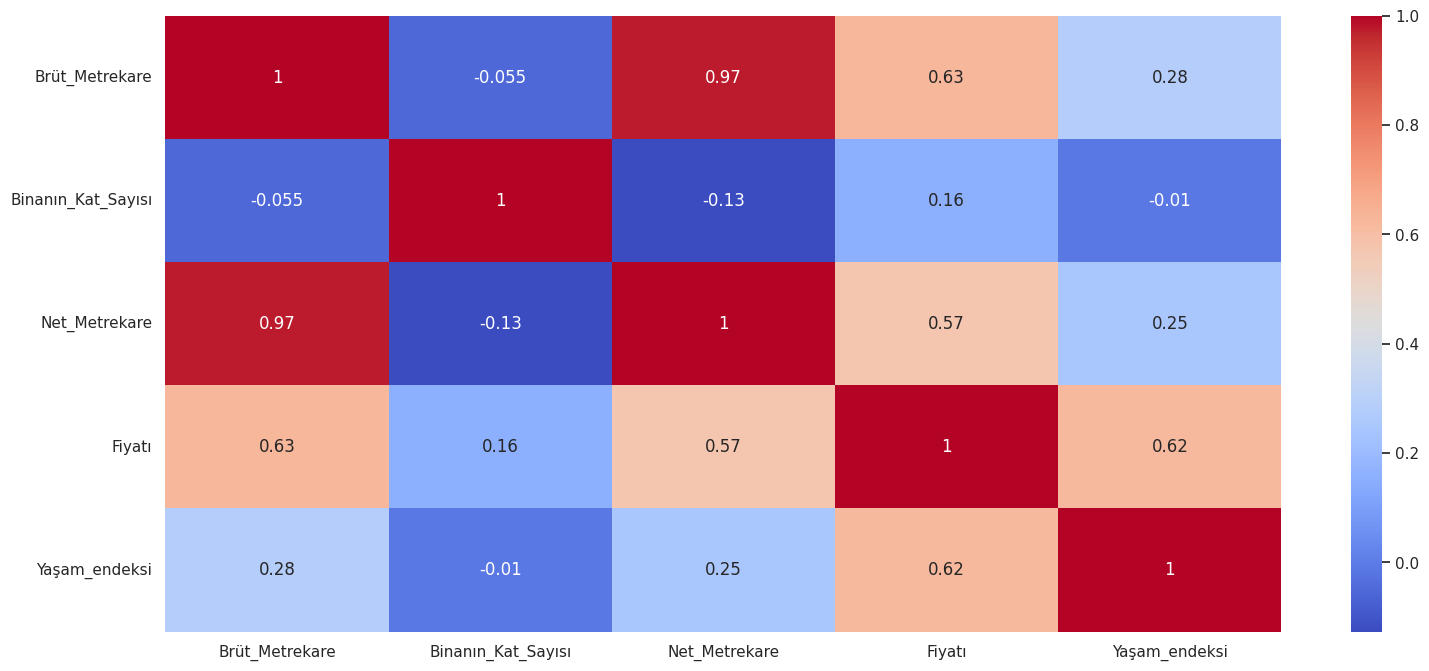

In [96]:
num_cols = df.select_dtypes (include= ["int64","float64"])

fig, ax = plt.subplots(figsize=(18,8))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', ax=ax)

In [97]:
# le = LabelEncoder()
# Label = df.select_dtypes(include=["object"])

# for i in Label:
#     if df[i].nunique() < 3:
#         df[i] = le.fit_transform(df[i])
#     else:
#         df = pd.get_dummies(df, columns=[i], dtype=int)

In [98]:
le = LabelEncoder()
Label = df.select_dtypes(include=["object"])

for i in Label:
    df[i] = le.fit_transform(df[i])

In [99]:
df.head()

,Brüt_Metrekare,Binanın_Yaşı,Binanın_Kat_Sayısı,Kullanım_Durumu,Eşya_Durumu,Banyo_Sayısı,Net_Metrekare,Oda_Sayısı,Bulunduğu_Kat,Isıtma_Tipi,Fiyatı,İlçe,Mahalle,yaka,Yaşam_endeksi
0,190.0,8,20.0,1,1,3,168.0,10,0,2,8204375.0,6,130,1,0.911
1,300.0,5,2.0,1,1,5,249.0,13,32,0,8204375.0,6,7,1,0.911
2,300.0,5,3.0,2,1,3,249.0,14,33,0,8204375.0,6,115,1,0.911
3,300.0,8,4.0,1,1,5,249.0,17,33,0,8204375.0,6,114,1,0.911
4,160.0,5,2.0,2,1,0,140.0,7,0,0,4250000.0,6,130,1,0.911


In [100]:
X = df.drop('Fiyatı', axis=1)
Y = df['Fiyatı']

In [101]:
mi_score1 = mutual_info_regression (X, Y)
mi_score1 = pd. Series (mi_score1)
mi_score1.index = X. columns
mi_score1.sort_values (ascending=True)

Isıtma_Tipi           0.000000
Kullanım_Durumu       0.011344
Eşya_Durumu           0.019886
Binanın_Yaşı          0.043298
yaka                  0.046222
Bulunduğu_Kat         0.152987
Binanın_Kat_Sayısı    0.159409
Oda_Sayısı            0.185811
Mahalle               0.207474
Banyo_Sayısı          0.208968
Net_Metrekare         0.251207
Brüt_Metrekare        0.342218
Yaşam_endeksi         0.433946
İlçe                  0.444359
dtype: float64

<Axes: >

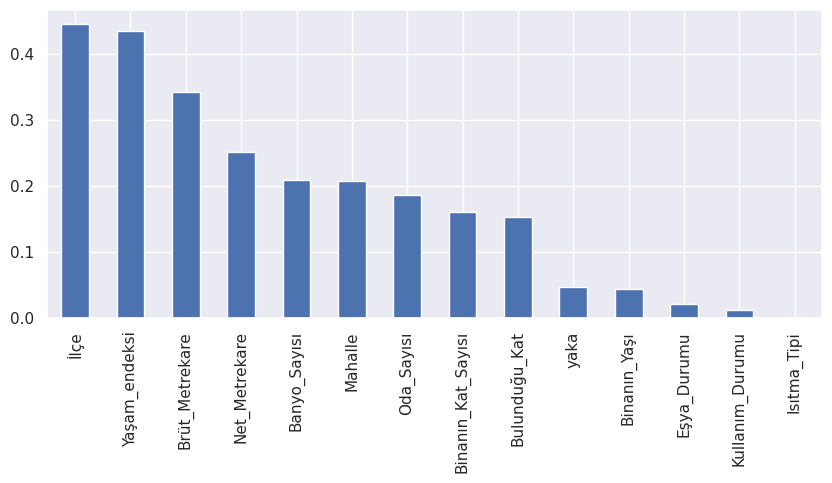

In [102]:
mi_score1.sort_values(ascending=False).plot.bar(figsize=(10,4))

In [103]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [104]:
pc = PCA()

X = pc.fit_transform(X)

In [105]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [106]:
def logistic_train(x_train, x_test, y_train, y_test):
    from sklearn.linear_model import LogisticRegression

    model = LogisticRegression()

    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    accaurary = accuracy_score(y_test, pred)

    return accaurary

In [107]:
def linear_train(x_train, x_test, y_train, y_test):
    from sklearn.linear_model import LinearRegression

    model = LinearRegression()

    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)

    return score

In [108]:
def decision_tree_train(x_train, x_test, y_train, y_test):
    from sklearn.tree import DecisionTreeClassifier

    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(x_train, y_train)

    predictions = decision_tree.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

In [109]:
def ridge_and_lasso_train(x_train, x_test, y_train, y_test):
    from sklearn.linear_model import RidgeClassifier, Lasso

    ridge_model = RidgeClassifier(alpha=1.0)
    ridge_model.fit(x_train, y_train)

    lasso_model = Lasso(alpha=1.0)
    lasso_model.fit(x_train, y_train)

    ridge_pred = ridge_model.predict(x_test)
    lasso_pred = lasso_model.predict(x_test)

    from sklearn.metrics import accuracy_score

    ridge_accuracy = accuracy_score(y_test, ridge_pred)
    lasso_accuracy = accuracy_score(y_test, lasso_pred)

    return ridge_accuracy, lasso_accuracy

In [110]:
def random_forest_train(x_train, x_test, y_train, y_test):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score

    # Rastgele Orman sınıflandırma modelini eğitme
    forest_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
    forest_model.fit(x_train, y_train)

    # Modeli test etme
    forest_pred = forest_model.predict(x_test)

    # Doğruluk oranını hesaplama
    accuracy = accuracy_score(y_test, forest_pred)
    return accuracy

In [111]:
def XGBoost_train(x_train, x_test, y_train, y_test):
    import xgboost as xgb
    from sklearn.metrics import accuracy_score

    # XGBoost sınıflandırma modelini eğitme
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100)
    xgb_model.fit(x_train, y_train)

    # Modeli test etme
    xgb_pred = xgb_model.predict(x_test)

    # Doğruluk oranını hesaplama
    accuracy = accuracy_score(y_test, xgb_pred)
    return accuracy

In [112]:
def gradient_boosting_train(x_train, x_test, y_train, y_test):
    from sklearn.ensemble import GradientBoostingClassifier

    # Gradient Boosting modelini eğitme
    gb_model = GradientBoostingClassifier(n_estimators=100)
    gb_model.fit(x_train, y_train)

    # Modeli test etme
    y_pred = gb_model.predict(x_test)

    # Doğruluk (accuracy) hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [113]:
def KNN_train(x_train, x_test, y_train, y_test):
    from sklearn.neighbors import KNeighborsClassifier

    # K-NN modelini eğitme
    knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(x_train, y_train)

    # Modeli test etme
    y_pred = knn_model.predict(x_test)

    # Doğruluk (accuracy) hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


In [114]:
def MLP_train(x_train, x_test, y_train, y_test):
    from sklearn.neural_network import MLPClassifier

    # MLP modelini eğitme
    mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
    mlp_model.fit(x_train, y_train)

    # Modeli test etme
    y_pred = mlp_model.predict(x_test)

    # Doğruluk (accuracy) hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [120]:
logistic = logistic_train(x_train, x_test, y_train, y_test)
linear = linear_train(x_train, x_test, y_train, y_test)
decision_tree = decision_tree_train(x_train, x_test, y_train, y_test)
#ridge_and_lasso = ridge_and_lasso_train(x_train, x_test, y_train, y_test) #bunlar tahmin degil siniflandirma algoritmasi
random_forest = random_forest_train(x_train, x_test, y_train, y_test)
#XGBoost = XGBoost_train(x_train, x_test, y_train, y_test)
#gradient_boosting = gradient_boosting_train(x_train, x_test, y_train, y_test)
KNN = KNN_train(x_train, x_test, y_train, y_test)
MLP = MLP_train(x_train, x_test, y_train, y_test)

/home/esti002/miniconda3/envs/mlenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/esti002/miniconda3/envs/mlenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [121]:
print("logistic: ", logistic)
print("linear: ", linear)
print("decision_tree: ", decision_tree)
#print("ridge: ", str(ridge_and_lasso[0])) 
#print("lasso: ", str(ridge_and_lasso[1]))
print("random_forest: ", random_forest)
#print("XGBoost: ", XGBoost)
print("K-NN:", KNN)
print("MLP:", MLP)

logistic:  0.10738255033557047
linear:  0.6315661024131891
decision_tree:  0.08053691275167785
random_forest:  0.10234899328859061
K-NN: 0.07718120805369127
MLP: 0.08389261744966443
